# 고객군집화
* 통계적 방법으로 일정 점 찍어두고 비슷한 거리의 점들 묶는 것
* -> 추천시스템과 연관됨


## 군집화 알고리즘
* K-means Clustering : 간단하고 학습도 빠름/ 이상치에 민감하기 때문에 원형이 아닌 군집은 찾기 어려움  
* 계층적 군집화 : 많은 군집에서 줄여나가는 방식, 덴드로그램 트리 형식
* DBSCAN : 밀도 기반의 군집화 방식  

### K-menas 알고리즘

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


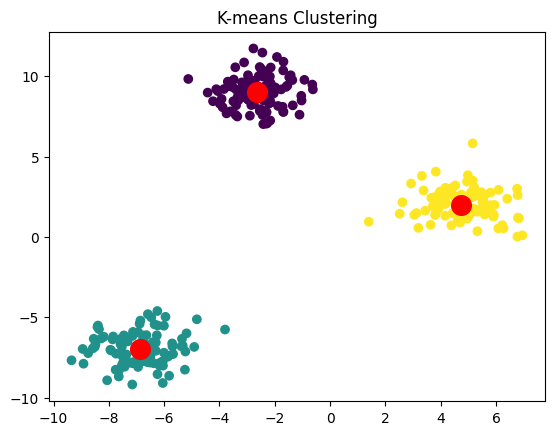

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 데이터 생성
data, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# K-means 알고리즘 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
predicted_labels = kmeans.labels_

# 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("K-means Clustering")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


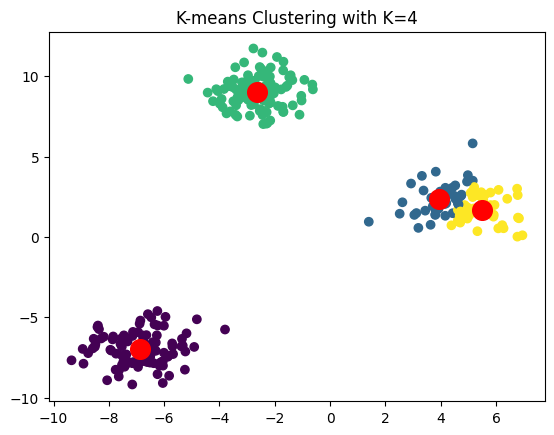

In [2]:
# K-means 알고리즘 적용 (K=4)
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
predicted_labels = kmeans.labels_

# 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("K-means Clustering with K=4")
plt.show()

### PCA 주성분분석
* 다변량변수 압축해서 보고자할때 많이 사용함
* 통계학에서 요인분석으로 사용하거나/ K-means와 같이 사용하기도함
* 차원축소 필요함
* 보통 정형데이터 이용하는데, 범주형변수 있을때는 수치화나 encoding하여 사용할 수는 있지만 많이 사용하지는 않음

Iris 데이터

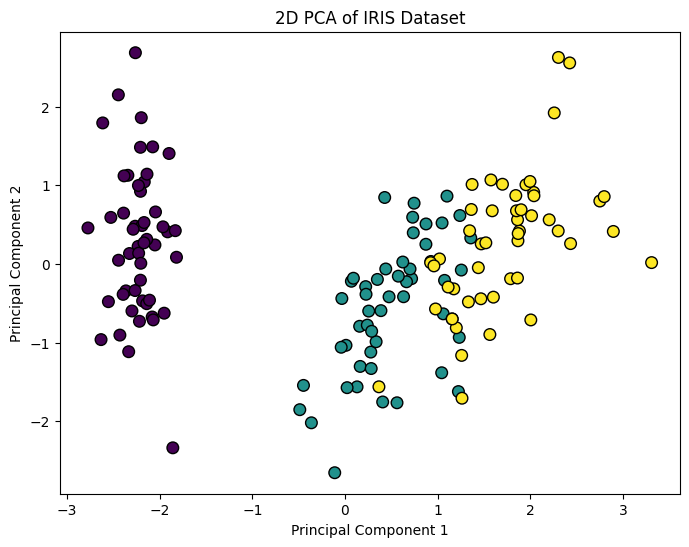

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 데이터 로드
iris = load_iris()
data = iris.data
target = iris.target

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# PCA 적용
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=target, cmap='viridis', edgecolor='k', s=70)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of IRIS Dataset')
plt.show()

Digit dataset

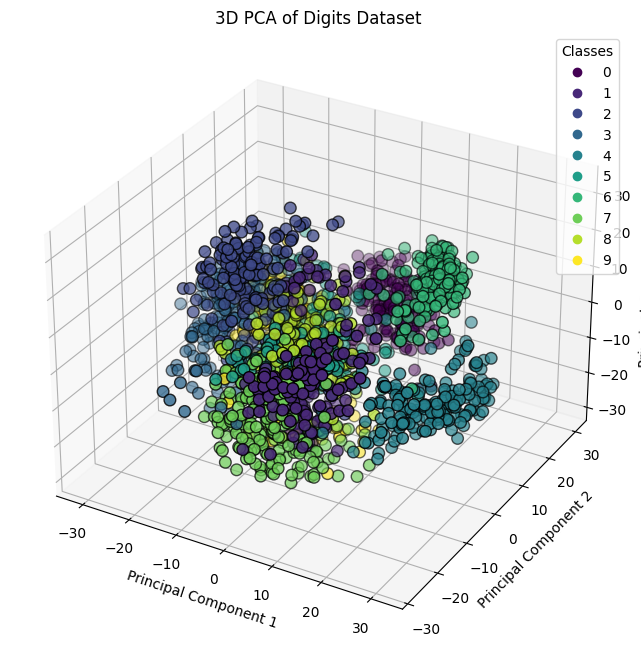

In [4]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# 데이터 로드
digits = load_digits()
data = digits.data
target = digits.target

# PCA 적용 (3차원으로 축소)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=target, cmap='viridis', edgecolor='k', s=70)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Digits Dataset')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

### 단드로그램 (계층적 군집화)

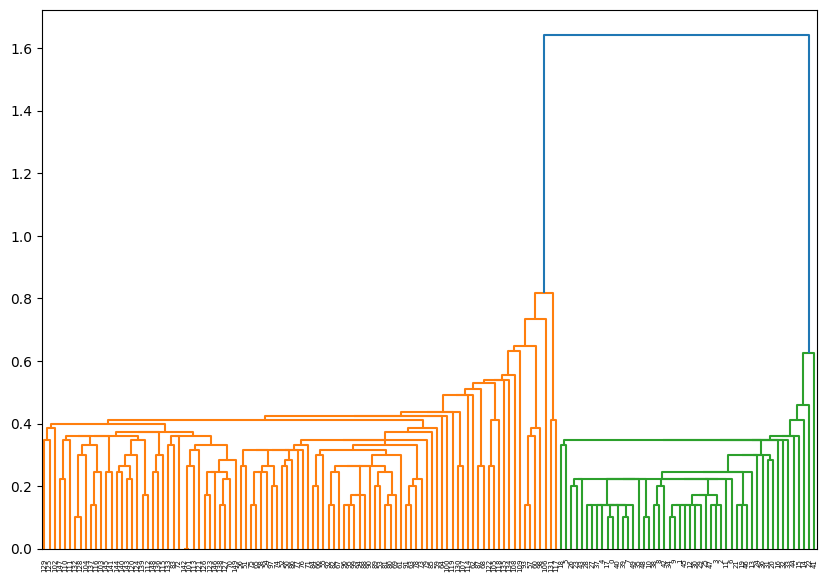

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# 데이터 로드
iris = load_iris()
data = iris.data

# 계층적 클러스터링
linked = linkage(data, method='single')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

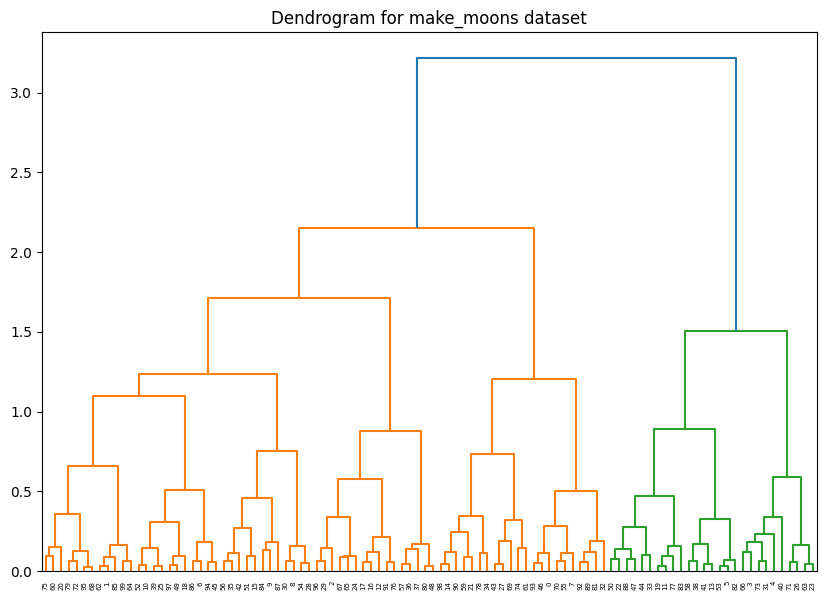

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons

# 데이터 생성
data, labels = make_moons(n_samples=100, noise=0.05, random_state=42)

# 계층적 클러스터링
linked = linkage(data, method='complete')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for make_moons dataset")
plt.show()

### DBSCAN

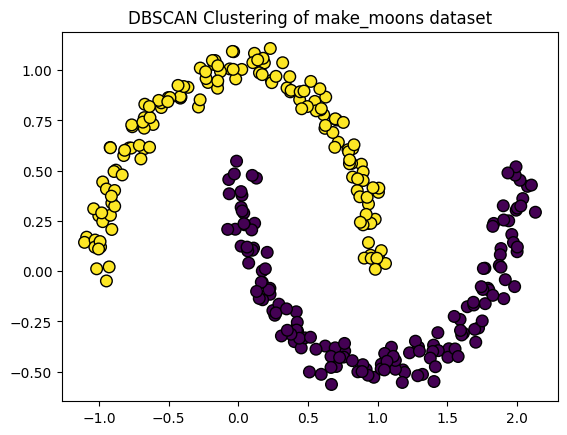

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# 데이터 생성
data, labels = make_moons(n_samples=300, noise=0.05, random_state=42)

# DBSCAN 적용
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(data)

# 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=70)
plt.title("DBSCAN Clustering of make_moons dataset")
plt.show()


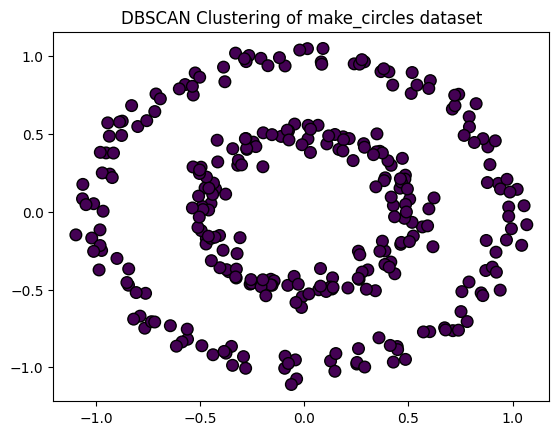

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# 데이터 생성
data, labels = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# DBSCAN 적용
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(data)

# 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=70)
plt.title("DBSCAN Clustering of make_circles dataset")
plt.show()

## 알고리즘 비교
**종합**:

- **K-means**는 원형 클러스터가 명확하게 구분되는 대규모 데이터셋에 적합합니다.
- **PCA**는 데이터의 차원을 축소하거나 시각화가 필요할 때 사용됩니다.
- **계층적 클러스터링**은 데이터의 계층적 구조를 탐색하거나 클러스터의 수가 미리 알려져 있지 않은 경우에 유용합니다.
- **DBSCAN**은 클러스터의 형태가 복잡하거나 노이즈가 있는 데이터셋에 적합하며, 클러스터의 수를 미리 지정할 필요가 없습니다.

## 평가지표


### 실루엣 계수 (Silhouette Coefficient)
* 클러스터 내의 데이터 포인트 간의 거리가 얼마나 가까운지, 그리고 다른 클러스터와 얼마나 잘 구분되는지를 측정하는 지표
- 실루엣 계수는 -1에서 1사이의 값을 가집니다.
- 값이 1에 가까울수록 클러스터링이 잘 되었다고 판단할 수 있습니다.
- 0에 가까울 경우 클러스터링이 중첩되어 있다는 것을 의미합니다.
- -1의 값은 잘못된 클러스터링을 나타냅니다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


평균 실루엣 스코어: 0.88


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

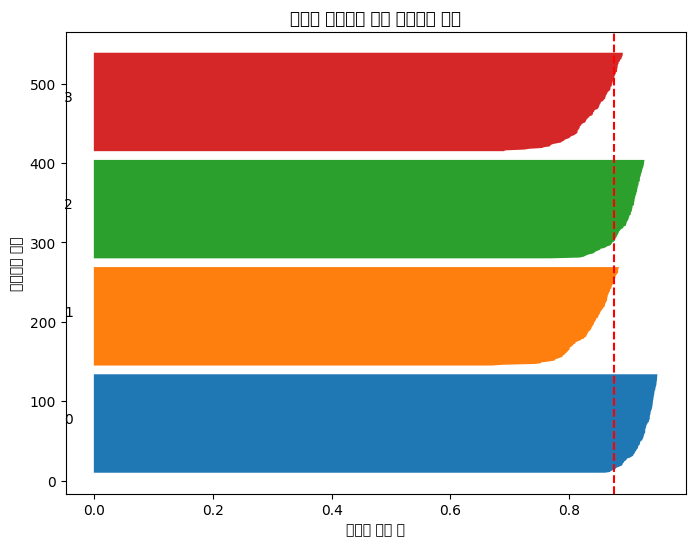

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 데이터 생성
data, labels = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(data)

# 실루엣 스코어 계산
silhouette_avg = silhouette_score(data, cluster_labels)
print(f"평균 실루엣 스코어: {silhouette_avg:.2f}")

# 각 데이터 포인트의 실루엣 스코어 계산
sample_silhouette_values = silhouette_samples(data, cluster_labels)

# 실루엣 스코어를 기반으로 시각화
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(4):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("실루엣 스코어에 따른 클러스터 분포")
ax.set_xlabel("실루엣 계수 값")
ax.set_ylabel("클러스터 번호")
plt.show()

In [ ]:
# 대략적인 그림으로 파악한뒤
# 1에 가깝지 않은 그룹 -> 특성 확인 / 다른 그룹과 합치거나 하는 등

### 외부 지표 (External Indices):

실제 클러스터 레이블이 알려진 경우에 사용되는 평가 방법입니다.

- **정확도 (Accuracy)**: 전체 데이터 중 올바르게 클러스터링된 데이터의 비율
- **정밀도 (Precision) & 재현율 (Recall)**
- **F1-점수 (F1-Score) / Rand Index (RI) 등**

### 내부 지표 (Internal Indices):

실제 클러스터 레이블이 알려져 있지 않은 경우에 사용되는 평가 방법입니다.

- **Davies-Bouldin Index**: 클러스터 간의 거리와 클러스터 내의 데이터 포인트 간의 거리를 기반으로 클러스터링의 품질을 평가하는 지표
- **Dunn Index**: 클러스터 내부의 거리가 작고 클러스터 간 거리가 큰 경우 값이 큰 지표

## 데이터 전처리 팁
1. **정규화 (Normalization)**:
    - 군집화는 거리 기반의 메트릭을 사용하기 때문에 특성 간의 스케일 차이가 결과에 영향을 줄 수 있습니다. 따라서 데이터를 정규화하는 것이 중요합니다.
2. **결측치 처리**:
    - 결측치가 있는 데이터는 군집화에 부정적인 영향을 줄 수 있으므로, 적절한 방법으로 결측치를 처리해야 합니다 (예: 평균 값으로 대체, 삭제 등).
3. **이상치 탐지 및 처리**:
    - 특히 K-means와 같은 군집화 방법은 이상치에 민감하므로, 이상치 탐지 및 제거가 필요합니다.
4. **클러스터 수 결정**:
    - 여러 가지 방법 (예: Elbow Method, Silhouette Analysis)을 사용하여 최적의 클러스터 수를 결정하는 것이 중요합니다.
5. **후처리**:
    - 클러스터링 결과를 바탕으로 추가 분석을 수행하거나, 클러스터링 결과를 다른 머신러닝 모델의 입력으로 사용하기도 합니다.

## **실무에서의 문제점 및 해결 방법**

1. **클러스터링 결과의 해석**:
    - 클러스터링은 비지도 학습 방법이므로 결과의 해석이 주관적일 수 있습니다. 이를 위해 도메인 지식을 활용하거나 전문가의 의견을 구하는 것이 중요합니다.
2. **데이터의 복잡성**:
    - 고차원 데이터나 복잡한 구조를 가진 데이터의 경우 클러스터링이 어려울 수 있습니다. 이를 위해 차원 축소 기법 (예: PCA)을 사용하거나, 복잡한 구조를 다룰 수 있는 알고리즘 (예: DBSCAN)을 선택하는 것이 중요합니다.
3. **실시간 클러스터링**:
    - 실시간으로 업데이트되는 데이터에 대해 클러스터링을 수행하려면, 온라인 클러스터링 알고리즘의 사용이 필요합니다.
4. **결과의 안정성**:
    - 일부 알고리즘 (예: K-means)은 초기값에 따라 결과가 달라질 수 있습니다. 여러 번 실행하여 안정적인 결과를 얻거나, 초기값 선택 방법을 개선하는 것이 중요합니다.

In [ ]:
## 결국 비지도학습이기 때문에 결과 해석이 어려울 수 있음
#-> 도메인 지식 바탕으로 해석해야함

# 실습

## K-평균 온라인 판매 데이터 군집분석
* 타겟 마케팅, 비지도 학습, 군집화, K-평균을 활용한 응용 방법
* 비지도학습으로 패턴 찾고 전략 설정
* 군집화, K-Means, 실루엣 분석 등으로 평가


링크 : https://colab.research.google.com/drive/1OYGuallacMIO0cKrOVAcMHZhOwPJ1wtY